In [50]:
import pandas as pd

data = pd.read_csv('/Users/selinwork/Documents/Ironhack/Ironhack_Week_9/Kaggle_Ok_Cupid/cleaned_dataset.csv')

<h1 style="color:#6a9fb5;">EDA</h1>

In [51]:
bins = [18, 25, 30, 40, 50, float('inf')]  # Define bins
labels = ['18-25', '25-30', '30-40', '40-50', '50+']  # Define labels

# Apply grouping to the numerical age column in the second dataset
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [52]:
# Drop essay columns for EDA
essay_columns = ['self_summary', 'life_work', 'skills', 'first_notice', 'favorites', 
                 'cant_live_without', 'thinking_about', 'friday_night', 'private_admission', 'message_me_if']

eda_data = data.drop(columns=essay_columns)

# Verify the new dataset
print(eda_data.head())

  gender     status    age  height       body_type education  income  \
0      m     single  18-25    75.0  a little extra   College      -1   
1      m     single  30-40    70.0         average     Other   80000   
2      m  available  30-40    68.0            thin   Masters      -1   
3      m     single  18-25    71.0            thin   College   20000   
4      m     single  25-30    66.0        athletic   College      -1   

                kids            smoking    drinks       drugs  \
0            No Kids  Occasional Smoker  socially       never   
1            No Kids         Non-Smoker     often   sometimes   
2         No Comment         Non-Smoker  socially  no comment   
3  Doesn't Want Kids         Non-Smoker  socially  no comment   
4         No Comment         Non-Smoker  socially       never   

              language                          job  
0              Unknown               transportation  
1  English Fluent Only         hospitality / travel  
2             

In [53]:
eda_data.shape

(59946, 13)

<h1 style="color:#6a9fb5;">Extracting and Merging with previous Dataset </h1>

In [54]:
df = pd.read_csv('/Users/selinwork/Documents/Ironhack/Ironhack_Week_9/Kaggle_Ok_Cupid/Final_Combined_Dating_Dataset_Updated.csv')
df.head()

,Time,Age,Gender,UsedApps,UsageFreq,LookingFor,UsageDuration,GhostingExp,OverallExp,NoAppReason,...,MeetingLoc,Punctuality,Comfort,MeetAgain,ReviewTime,ReflectBeforeSwipe,NoShow,OpenToQR,BehaviorPromt,ConsciousModule
0,2023-01-01,30-40,Female,Yes,Occasionally,Short-term or casual relationship,1-6 months,Both,Negative,Prefer real connection over online dating,...,Private,Yes,No,No,Seconds,No,Yes,Yes,Yes,No
1,2023-01-01,40-50,Male,No,Frequently,Short-term or casual relationship,1-6 months,Ghosting,Negative,Have been in a relationship since I was a minor,...,Depends,Yes,Somewhat,Yes,Seconds,Yes,No,Yes,No,Yes
2,2023-01-01,25-30,Male,No,Rarely,Long-term relationship,more than 1 year,Both,Negative,Not interested,...,Public,No,Somewhat,Maybe,Seconds,Yes,No,Yes,Neutral,No
3,2023-01-01,40-50,Male,Yes,Rarely,I don't know yet,more than 1 year,Both,Very negative,Prefer real connection over online dating,...,Private,Yes,No,Maybe,Minutes,No,No,No,No,No
4,2023-01-01,40-50,Female,Yes,Occasionally,I don't know yet,1-6 months,Being ghosted,Negative,Prefer real connection over online dating,...,Private,Yes,Somewhat,No,Seconds,No,No,Yes,Neutral,No


In [55]:
df = df.drop(['Time','Gender', 'UsedApps', 'UsageFreq', 'LookingFor', 'UsageDuration', 'NoAppReason', 'OpenToQR', 'IntentToUse'], axis=1)

In [56]:
df.columns = df.columns.str.lower()
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

/var/folders/rp/xh3vdlq17n94q_y2mld23x5r0000gn/T/ipykernel_49014/2693745710.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if type(s) == str else s)


In [57]:
merged_df = pd.merge(eda_data, df, on='age', how='left')
print(merged_df.shape)

(7199080, 26)


In [58]:
print(eda_data.shape)  # Check the number of rows and columns in `data`
print(eda_data['age'].duplicated().sum())  # Check for duplicate age values

(59946, 13)
59941


In [59]:
print(df.shape)  # Check the number of rows and columns in `df`
print(df['age'].duplicated().sum())  # Check for duplicate age values

(500, 14)
497


In [60]:
# Deduplicate the right dataset by keeping the first occurrence 
df= df.drop_duplicates(subset=['age'], keep='first')

In [61]:
merged_df = pd.merge(eda_data, df, on='age', how='left')
print(merged_df.shape)  # Check the shape of the merged dataset

(59946, 26)


In [62]:
merged_df['height'] = merged_df['height'].fillna(merged_df['height'].mode()[0])

In [63]:
columns_to_fill = ['ghostingexp', 'overallexp', 'meetingfreq','datespermatch','meetingloc','punctuality','comfort','meetagain','reviewtime',
                   'reflectbeforeswipe','noshow', 'behaviorpromt', 'consciousmodule']

# Ensure columns exist in the DataFrame
columns_to_fill = [col for col in columns_to_fill if col in merged_df.columns]

# Fill missing values
merged_df[columns_to_fill] = merged_df[columns_to_fill].fillna(merged_df[columns_to_fill].mode().iloc[0])

In [64]:
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
gender                0
status                0
age                   0
height                0
body_type             0
education             0
income                0
kids                  0
smoking               0
drinks                0
drugs                 0
language              0
job                   0
ghostingexp           0
overallexp            0
meetingfreq           0
datespermatch         0
meetingloc            0
punctuality           0
comfort               0
meetagain             0
reviewtime            0
reflectbeforeswipe    0
noshow                0
behaviorpromt         0
consciousmodule       0
dtype: int64


In [65]:
merged_df.head()

,gender,status,age,height,body_type,education,income,kids,smoking,drinks,...,datespermatch,meetingloc,punctuality,comfort,meetagain,reviewtime,reflectbeforeswipe,noshow,behaviorpromt,consciousmodule
0,m,single,18-25,75.0,a little extra,College,-1,No Kids,Occasional Smoker,socially,...,2-3,private,yes,somewhat,no,seconds,yes,no,yes,no
1,m,single,30-40,70.0,average,Other,80000,No Kids,Non-Smoker,often,...,2-3,private,yes,no,no,seconds,no,yes,yes,no
2,m,available,30-40,68.0,thin,Masters,-1,No Comment,Non-Smoker,socially,...,2-3,private,yes,no,no,seconds,no,yes,yes,no
3,m,single,18-25,71.0,thin,College,20000,Doesn't Want Kids,Non-Smoker,socially,...,2-3,private,yes,somewhat,no,seconds,yes,no,yes,no
4,m,single,25-30,66.0,athletic,College,-1,No Comment,Non-Smoker,socially,...,more than 3,public,no,somewhat,maybe,seconds,yes,no,neutral,no


In [66]:
merged_df.to_csv('merged_data.csv', index=False)
merged_df.to_excel('merged_data.xlsx', index=False)

In [67]:
# Gender distribution
print("\nGender Distribution:")
print(merged_df['gender'].value_counts())

# Age group distribution
print("\nAge Distribution:")
print(merged_df['age'].value_counts())


Gender Distribution:
gender
m        31073
f        20533
other     8340
Name: count, dtype: int64

Age Distribution:
age
30-40    19846
25-30    17818
18-25    10923
40-50     7338
50+       4021
Name: count, dtype: int64


<h1 style="color:#6a9fb5;">Distributions </h1>

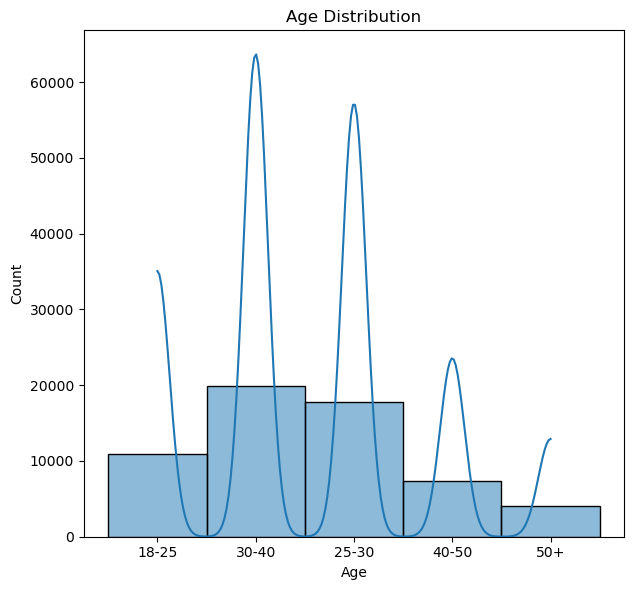

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram for age and income
plt.figure(figsize=(12, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(data=merged_df, x='age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

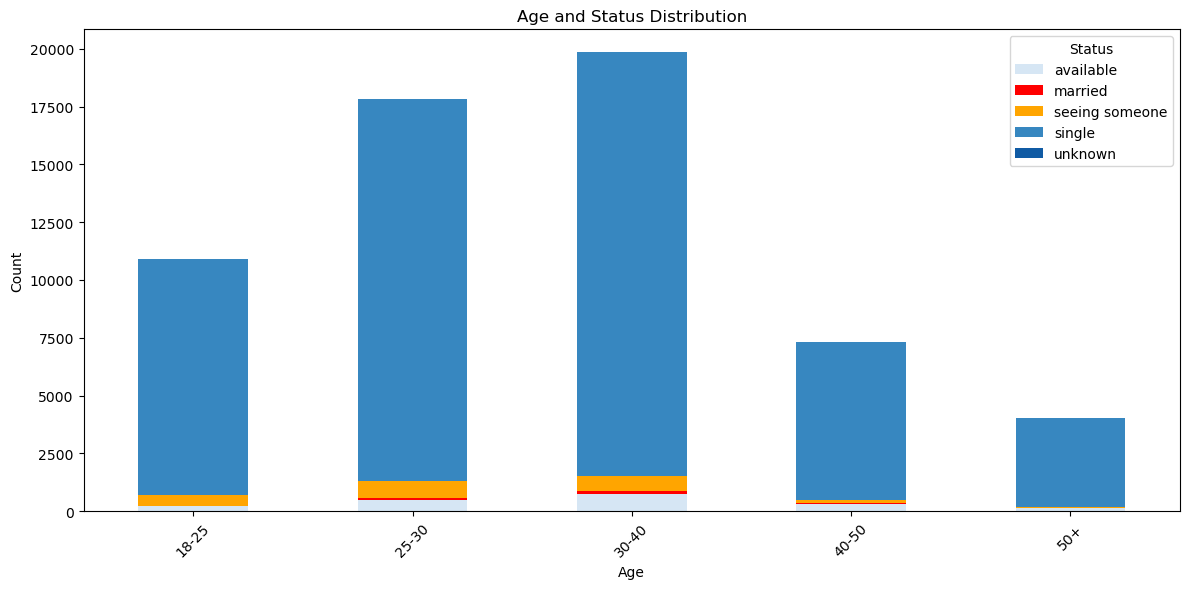

In [112]:
grouped_status = merged_df.groupby(['age', 'status']).size().unstack()
grouped_status


status_colors = sns.color_palette("Blues", n_colors=grouped_status.shape[1])

status_mapping = {'seeing someone': 'orange', 'married': 'red'}

final_colors = [status_mapping.get(status, status_colors[i]) for i, status in enumerate(grouped_status.columns)]

# Plot with updated colors
grouped_status.plot(kind='bar', stacked=True, color=final_colors, figsize=(12, 6))
plt.title('Age and Status Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


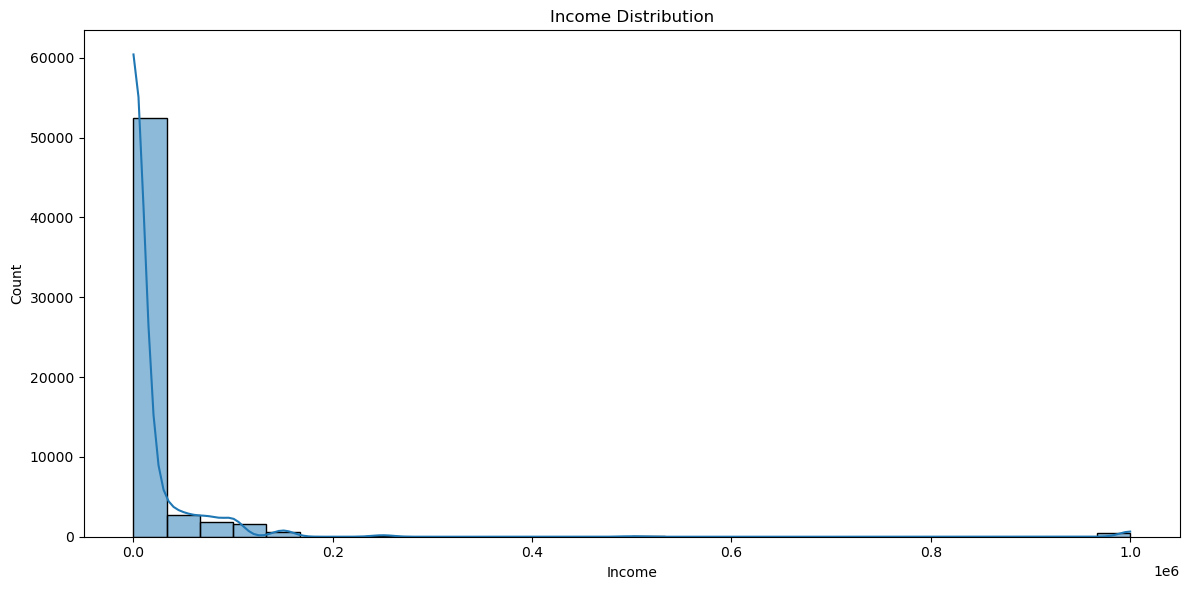

In [69]:
# Income distribution bar plot
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='income', kde=True, bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [70]:
grouped_df = round(pd.crosstab(merged_df['smoking'].replace(['Occasional Smoker', 'Quitting Smoker', 'Regular Smoker'], 'Smoker'), merged_df['meetingloc'], 
                        normalize='index') * 100, 2)
grouped_df

meetingloc,depends,private,public
smoking,,,
Non-Smoker,13.23,57.52,29.25
Smoker,7.61,60.44,31.95


In [71]:
crosstab_education = round(pd.crosstab(merged_df['education'], merged_df['kids'], normalize='index') * 100, 2)
crosstab_education

kids,Doesn't Want Kids,Has Kids,No Comment,No Kids,Wants Kids
education,,,,,
College,5.14,7.34,58.61,28.24,0.67
High School,7.88,16.99,45.42,28.78,0.93
Masters,4.24,8.75,57.77,28.42,0.82
Other,4.86,8.78,67.12,18.71,0.53
Ph.D.,3.99,8.39,59.84,27.03,0.75
Professional,2.61,9.91,59.03,28.02,0.43


In [72]:
crosstab_language = round(pd.crosstab(merged_df['language'], merged_df['education'], normalize='index') * 100, 2)
crosstab_language

education,College,High School,Masters,Other,Ph.D.,Professional
language,,,,,,
Basic English Speaker,53.92,4.58,14.50,21.41,3.39,2.20
Bilingual Fluent,56.74,2.19,22.89,9.10,5.66,3.41
English Fluent Only,62.60,3.02,18.05,9.12,3.84,3.39
Multilingual Fluent,46.82,1.66,29.91,7.53,9.97,4.11
Unknown,54.81,2.85,17.04,18.02,3.59,3.68


In [83]:
age_drugs = round(pd.crosstab(merged_df['age'], merged_df['drugs'], normalize='index') * 100, 2)
age_drugs

drugs,never,no comment,often,sometimes
age,,,,
18-25,57.99,21.29,1.87,18.86
25-30,59.37,25.48,0.67,14.49
30-40,62.94,25.61,0.34,11.10
40-50,69.90,21.75,0.18,8.18
50+,79.36,13.33,0.15,7.16


In [87]:
income_drugs = round(pd.crosstab(merged_df['drugs'].replace(['often','sometimes'], 'yes'), merged_df['income'], normalize='index') * 100, 2)
income_drugs

income,-1,20000,30000,40000,50000,60000,70000,80000,100000,150000,250000,500000,1000000
drugs,,,,,,,,,,,,,
never,80.55,4.36,1.70,1.75,1.75,1.34,1.33,2.09,2.99,1.21,0.28,0.07,0.56
no comment,87.13,2.66,1.08,1.06,1.14,0.87,0.83,1.21,2.07,0.81,0.18,0.08,0.88
yes,71.08,11.43,3.11,2.39,1.90,1.31,1.11,1.85,2.47,0.72,0.22,0.12,2.27


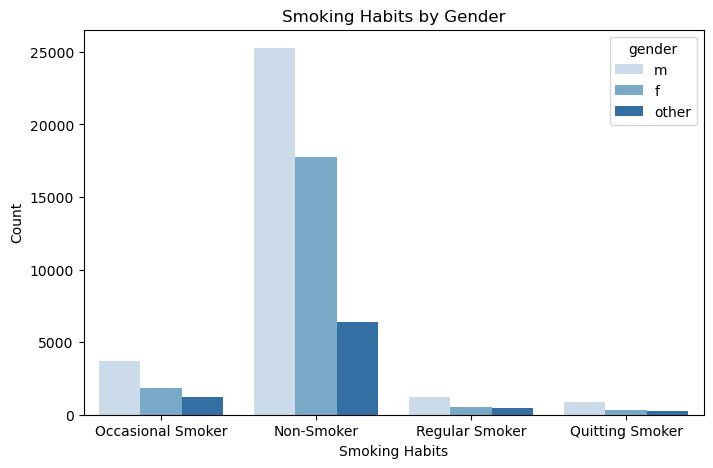

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='smoking', hue='gender', palette="Blues")  # Consistent 'Blues' palette
plt.title('Smoking Habits by Gender')
plt.xlabel('Smoking Habits')
plt.ylabel('Count')
plt.show()

In [79]:
crosstab_drinkers = round(pd.crosstab(merged_df['smoking'].replace(['Occasional Smoker', 'Quitting Smoker', 'Regular Smoker'], 'Smoker'), merged_df['drinks'], normalize='index') * 100, 2)
crosstab_drinkers

drinks,desperately,no comment,not at all,often,rarely,socially,very often
smoking,,,,,,,
Non-Smoker,0.40,5.74,5.73,6.66,10.55,70.5,0.42
Smoker,1.19,1.42,4.13,17.76,7.08,65.9,2.51


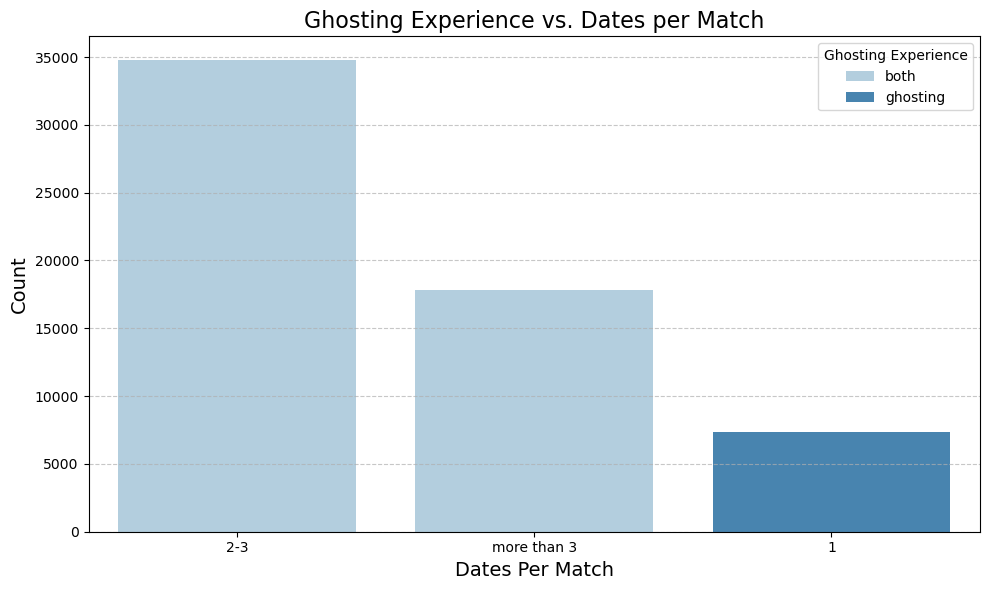

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to compare ghosting experience against dates per match
plt.figure(figsize=(10, 6))
sns.countplot(
    data=merged_df,
    x='datespermatch',
    hue='ghostingexp',
    palette="Blues"
)

# Customize the plot
plt.title('Ghosting Experience vs. Dates per Match', fontsize=16)
plt.xlabel('Dates Per Match', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Ghosting Experience', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [89]:
null_hypothesis = "There is no significant relationship between ghosting experience and dates per match."
alternative_hypothesis = "There is a significant relationship between ghosting experience and dates per match."

print(f"Null Hypothesis (H₀): {null_hypothesis}")
print()
print(f"Alternate Hypothesis (H₁): {alternative_hypothesis}")

Null Hypothesis (H₀): There is no significant relationship between ghosting experience and dates per match.

Alternate Hypothesis (H₁): There is a significant relationship between ghosting experience and dates per match.


In [101]:
alpha = 0.05  # Set the significance level

from scipy.stats import chi2_contingency

# Perform the chi-square test

chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(merged_df['datespermatch'], merged_df['ghostingexp']))
critical_value = chi2.ppf(1 - alpha, dof)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Critical Value: {critical_value:.4f}")


Chi-Square Statistic: 59946.0
P-value: 0.0000
Degrees of Freedom: 2
Critical Value: 5.9915


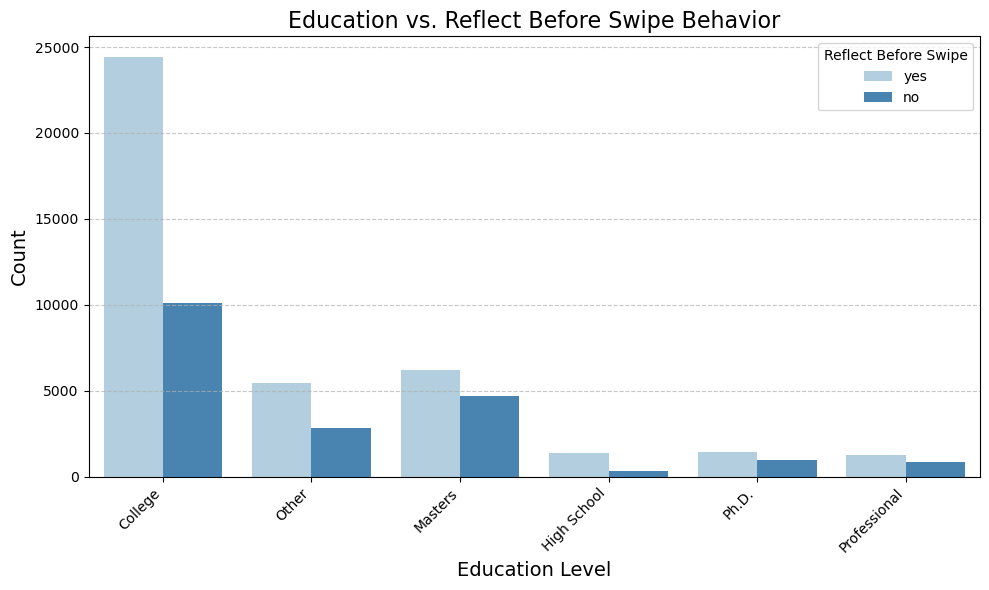

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to compare education levels against 'reflect before swipe' behavior
plt.figure(figsize=(10, 6))
sns.countplot(
    data=merged_df,
    x='education',
    hue='reflectbeforeswipe',
    palette="Blues"
)

# Customize the plot
plt.title('Education vs. Reflect Before Swipe Behavior', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Reflect Before Swipe', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [100]:
from scipy.stats import chi2_contingency

# Perform the chi-square test

chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(merged_df['education'], merged_df['reflectbeforeswipe']))
critical_value = chi2.ppf(1 - alpha, dof)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Critical Value: {critical_value:.4f}")


Chi-Square Statistic: 978.4492212793926
P-value: 0.0000
Degrees of Freedom: 5
Critical Value: 11.0705


In [76]:
# For the NLP part
# Combine merged_df with the essay columns from the original data
nlp_data = pd.concat([merged_df, data[essay_columns]], axis=1)

# Verify the new dataset
nlp_data.head()
nlp_data.shape

(59946, 36)

In [77]:
nlp_data.to_csv('nlp_data.csv', index=False)